In [1]:
%load_ext sql
%sql mysql://sywang@localhost/?charset=utf8mb4

In [2]:
database = 'sywang_project' ## THIS IS YOUR SUNETID
msgs_table = 'threadheads'
outcomes_table = 'threads'
feat_topics_table = 'feat$cat_ags_cp_w$threadheads$thread_id$1gra'

In [3]:
%sql use {database}

 * mysql://sywang@localhost/?charset=utf8mb4
0 rows affected.


[]

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Basic Descriptive Counts

In [5]:
%%sql 
select count(distinct feat) from feat$1to2gram$threadheads$thread_id$16to16$0_02$pmi5_0;

 * mysql://sywang@localhost/?charset=utf8mb4
1 rows affected.


count(distinct feat)
1192


In [6]:
%%sql 
select count(distinct group_id) from feat$1to2gram$threadheads$thread_id$16to16$0_02$pmi5_0;

 * mysql://sywang@localhost/?charset=utf8mb4
1 rows affected.


count(distinct group_id)
542


# See how many replies a post will have based on its title and content

In [21]:
result=%sql select count(*) as num_posts, reply_num from threadheads, threads where threadheads.thread_id = threads.thread_id group by reply_num order by num_posts desc;

 * mysql://sywang@localhost/?charset=utf8mb4
22 rows affected.


In [22]:
df=result.DataFrame()
df

,num_posts,reply_num
0,234,0
1,85,1
2,45,3
3,43,2
4,28,4
5,25,5
6,19,6
7,15,8
8,9,7
9,8,9


Text(0, 0.5, 'Number of Posts')

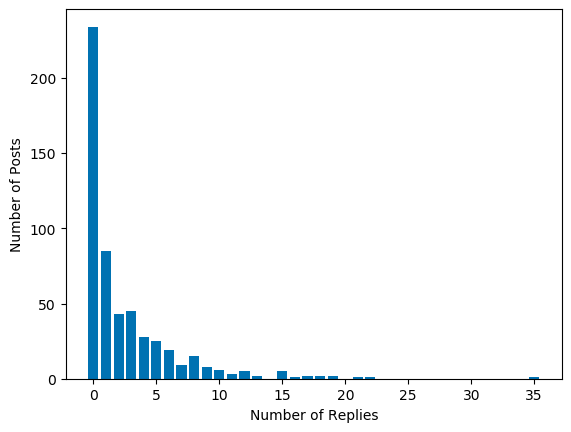

In [30]:
plt.style.use('seaborn-colorblind')
plt.bar(df["reply_num"], df["num_posts"])
plt.xlabel("Number of Replies")
plt.ylabel("Number of Posts")

This is sort of sparse so we created a binary version, reply_num_b
UPDATE threads
SET reply_num_b = 1 WHERE reply_num > 0; 

In [18]:
%%sql select count(*) as num_posts, reply_num_b from threadheads, threads where threadheads.thread_id = threads.thread_id 
group by reply_num_b;

 * mysql://sywang@localhost/?charset=utf8mb4
2 rows affected.


num_posts,reply_num_b
234,0
308,1


At least that is more balanced, so let's work with that

In [11]:
#reply_num_b correlations with 1-3 grams
out_d = '~/ags/reply_num_b'
out_name = '1to2grams_reply_num_b'
!rm -rf {out_d}/{out_name}*
!mkdir -p {out_d}

!dlatkInterface.py \
    --corpdb {database} \
    --corptable {msgs_table} \
    --correl_field thread_id \
    --correlate --rmatrix --csv --sort \
    --feat_table 'feat$1to2gram$threadheads$thread_id$16to16$0_02$pmi5_0'\
    --group_freq_thresh 0 \
    --outcome_table {outcomes_table} \
    --outcomes reply_num_b \
    --tagcloud --make_wordclouds \
    --output_name {out_d}/{out_name}



/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


-----
DLATK Interface Initiated: 2020-11-16 05:22:09
-----
SQL QUERY: show tables like 'feat$1to2gram$threadheads$thread_id$16to16$0_02

In [6]:
#reply_num_b correlations with liwc
out_d = '~/ags/reply_num_b'
out_name = 'liwc_reply_num_b'
!rm -rf {out_d}/{out_name}*
!mkdir -p {out_d}

!dlatkInterface.py \
    --corpdb {database} \
    --corptable {msgs_table} \
    --correl_field thread_id \
    --correlate --rmatrix --csv --sort \
    --feat_table 'feat$cat_LIWC2015$threadheads$thread_id$1gra'\
    --group_freq_thresh 0 \
    --outcome_table {outcomes_table} \
    --outcomes reply_num_b \
    --tagcloud --make_wordclouds \
    --output_name {out_d}/{out_name}



/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


-----
DLATK Interface Initiated: 2020-11-17 00:25:59
-----
SQL QUERY: show tables like 'feat$cat_LIWC2015$threadheads$thread_id$1gra'
L

Most frequent words in the highest correlated LIWC dictionaries: 

In [14]:
out_name = 'liwc_reply_num_b_checkwords_work'

!dlatkInterface.py \
    --corpdb {database} \
    --corptable {msgs_table} \
    --correl_field thread_id --group_freq_thresh 0\
    --correlate --csv --rmatrix --sort \
    --feat_table 'feat$1gram$threadheads$thread_id$16to16$0_02' \
    --outcome_table {outcomes_table} \
    --outcomes reply_num_b  \
    --tagcloud --make_wordclouds \
    --whitelist --lex_table LIWC2015 --categories 'WORK' \
    --output_name {out_d}/{out_name}



/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


-----
DLATK Interface Initiated: 2020-11-17 00:39:48
-----
making black or white list: [[]] [LIWC2015] [['WORK']]
SQL QUERY: SELECT ter

In [15]:
out_name = 'liwc_reply_num_b_checkwords_health'

!dlatkInterface.py \
    --corpdb {database} \
    --corptable {msgs_table} \
    --correl_field thread_id --group_freq_thresh 0\
    --correlate --csv --rmatrix --sort \
    --feat_table 'feat$1gram$threadheads$thread_id$16to16$0_02' \
    --outcome_table {outcomes_table} \
    --outcomes reply_num_b  \
    --tagcloud --make_wordclouds \
    --whitelist --lex_table LIWC2015 --categories 'HEALTH' \
    --output_name {out_d}/{out_name}



/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


-----
DLATK Interface Initiated: 2020-11-17 00:40:01
-----
making black or white list: [[]] [LIWC2015] [['HEALTH']]
SQL QUERY: SELECT t

In [16]:
out_name = 'liwc_reply_num_b_checkwords_AFFILIATION'

!dlatkInterface.py \
    --corpdb {database} \
    --corptable {msgs_table} \
    --correl_field thread_id --group_freq_thresh 0\
    --correlate --csv --rmatrix --sort \
    --feat_table 'feat$1gram$threadheads$thread_id$16to16$0_02' \
    --outcome_table {outcomes_table} \
    --outcomes reply_num_b  \
    --tagcloud --make_wordclouds \
    --whitelist --lex_table LIWC2015 --categories 'AFFILIATION' \
    --output_name {out_d}/{out_name}



/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


-----
DLATK Interface Initiated: 2020-11-17 00:40:23
-----
making black or white list: [[]] [LIWC2015] [['AFFILIATION']]
SQL QUERY: SEL

In [17]:
out_name = 'liwc_reply_num_b_checkwords_FRIEND'

!dlatkInterface.py \
    --corpdb {database} \
    --corptable {msgs_table} \
    --correl_field thread_id --group_freq_thresh 0\
    --correlate --csv --rmatrix --sort \
    --feat_table 'feat$1gram$threadheads$thread_id$16to16$0_02' \
    --outcome_table {outcomes_table} \
    --outcomes reply_num_b  \
    --tagcloud --make_wordclouds \
    --whitelist --lex_table LIWC2015 --categories 'FRIEND' \
    --output_name {out_d}/{out_name}



/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


-----
DLATK Interface Initiated: 2020-11-17 00:40:35
-----
making black or white list: [[]] [LIWC2015] [['FRIEND']]
SQL QUERY: SELECT t

In [18]:
out_name = 'liwc_reply_num_b_checkwords_DRIVES'

!dlatkInterface.py \
    --corpdb {database} \
    --corptable {msgs_table} \
    --correl_field thread_id --group_freq_thresh 0\
    --correlate --csv --rmatrix --sort \
    --feat_table 'feat$1gram$threadheads$thread_id$16to16$0_02' \
    --outcome_table {outcomes_table} \
    --outcomes reply_num_b  \
    --tagcloud --make_wordclouds \
    --whitelist --lex_table LIWC2015 --categories 'DRIVES' \
    --output_name {out_d}/{out_name}



/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


-----
DLATK Interface Initiated: 2020-11-17 00:43:12
-----
making black or white list: [[]] [LIWC2015] [['DRIVES']]
SQL QUERY: SELECT t

In [19]:
out_name = 'liwc_reply_num_b_checkwords_POSEMO'

!dlatkInterface.py \
    --corpdb {database} \
    --corptable {msgs_table} \
    --correl_field thread_id --group_freq_thresh 0\
    --correlate --csv --rmatrix --sort \
    --feat_table 'feat$1gram$threadheads$thread_id$16to16$0_02' \
    --outcome_table {outcomes_table} \
    --outcomes reply_num_b  \
    --tagcloud --make_wordclouds \
    --whitelist --lex_table LIWC2015 --categories 'POSEMO' \
    --output_name {out_d}/{out_name}



/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


-----
DLATK Interface Initiated: 2020-11-17 00:43:23
-----
making black or white list: [[]] [LIWC2015] [['POSEMO']]
SQL QUERY: SELECT t

In [18]:
#reply_num_b correlations with topics
out_d = '~/ags/reply_num_b'
out_name = 'topics_reply_num_b'
!rm -rf {out_d}/{out_name}*
!mkdir -p {out_d}

!dlatkInterface.py \
    --corpdb {database} \
    --corptable {msgs_table} \
    --correl_field thread_id \
    --correlate --rmatrix --csv --sort \
    --feat_table '{feat_topics_table}'\
    --group_freq_thresh 0 \
    --outcome_table {outcomes_table} \
    --outcomes reply_num_b \
    --topic_tagcloud --make_topic_wordclouds \
    --topic_lexicon 'ags_freq' \
    --lexicondb {database} \
    --tagcloud_colorscheme blue \
    --output_name {out_d}/{out_name}



/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


-----
DLATK Interface Initiated: 2020-11-16 06:59:04
-----
SQL QUERY: show tables like 'feat$cat_ags_cp_w$threadheads$thread_id$1gra'
L